In [3]:
!apt-get install -y r-base
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev
!R -e "install.packages('lavaan')"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.0-3.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.20).
libssl-dev is already the newest version (3.0.2-0ubuntu1.19).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.

R version 4.5.0 (2025-04-11) -- "How About a Twenty-Six"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project w

In [4]:
!pip install rpy2


In [5]:
%load_ext rpy2.ipython


In [7]:
%%R
library(lavaan)
merged_data <- read.csv("/content/merged_data.csv")

In [9]:
%%R
model <- '
  fish_availability ~ temperature + osprey_count
  osprey_count ~ fish_availability + bald_eagle_count
  bald_eagle_count ~ fish_availability
'

merged_data$fish_availability <- scale(merged_data$fish_availability)
merged_data$osprey_count <- scale(merged_data$osprey_count)
merged_data$bald_eagle_count <- scale(merged_data$bald_eagle_count)
merged_data$temperature <- scale(merged_data$temperature)

fit <- sem(model, data = merged_data)

summary(fit, standardized = TRUE)

lavaan 0.6-19 ended normally after 14 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         8

  Number of observations                           360

Model Test User Model:
                                                      
  Test statistic                                 0.268
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.605

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                      Estimate  Std.Err  z-value  P(>|z|)   Std.lv  Std.all
  fish_availability ~                                                      
    temperature          0.954    0.037   25.614    0.000    0.954    0.954
    osprey_count        -0.358    0.044   -8.092    0.0

In [10]:
!R -e 'install.packages("stringr")'


R version 4.5.0 (2025-04-11) -- "How About a Twenty-Six"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages("stringr")
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/stringr_1.5.1.tar.gz'
Content type 'application/x-gzip' length 176599 bytes (172 KB)
downloaded 172 KB

* installing *source* package ‘stringr’ ...
**

In [18]:
!R -e 'install.packages("ggnetwork")'


R version 4.5.0 (2025-04-11) -- "How About a Twenty-Six"
Copyright (C) 2025 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> install.packages("ggnetwork")
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘igraph’

trying URL 'https://cran.rstudio.com/src/contrib/igraph_2.1.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ggnetwork_0.5.13.tar.gz'
* installing

In [19]:
%%R
library(lavaan) # Load lavaan if not already loaded
parameterEstimates(fit, standardized = TRUE) -> params
# Filter for regression coefficients
params[params$op == "~",] -> regressions

In [20]:
%%R
library(tidyverse) # Load tidyverse for data manipulation

# Create a data frame with from, to, and coefficient values
regressions %>%
  select(lhs, rhs, std.all) %>%
  rename(from = lhs, to = rhs, coefficient = std.all) -> df

In [21]:
%%R
df

               from                to coefficient
1 fish_availability       temperature       0.954
2 fish_availability      osprey_count      -0.358
3      osprey_count fish_availability       0.309
4      osprey_count  bald_eagle_count       0.696
5  bald_eagle_count fish_availability       0.320


In [22]:
%%R
parameterEstimates(fit, standardized = TRUE) -> params
params[params$op == "~",] -> regressions
regressions %>%
  select(lhs, rhs, std.all) %>%
  rename(from = lhs, to = rhs, coefficient = std.all) -> df

In [23]:
%%R
# Assuming 'df' is your data frame containing the network relationships
df2 <- df %>%
  mutate(
    temp = ifelse(from == "fish_availability" & to == "temperature", to,from),  # Swap if 'from' is "fish_availability" and 'to' is "temperature"
    to = ifelse(from == "fish_availability" & to == "temperature", from, to),
    from = temp      # Swap if 'from' is "fish_availability" and 'to' is "temperature"
  )
df2

               from                to coefficient              temp
1       temperature fish_availability       0.954       temperature
2 fish_availability      osprey_count      -0.358 fish_availability
3      osprey_count fish_availability       0.309      osprey_count
4      osprey_count  bald_eagle_count       0.696      osprey_count
5  bald_eagle_count fish_availability       0.320  bald_eagle_count


Loading required package: statnet.common

Attaching package: ‘statnet.common’

The following objects are masked from ‘package:base’:

    attr, order

Loading required package: network

‘network’ 1.19.0 (2024-12-08), part of the Statnet Project
* ‘news(package="network")’ for changes since last version
* ‘citation("network")’ for citation information
* ‘https://statnet.org’ for help, support, and other information

sna: Tools for Social Network Analysis
Version 2.8 created on 2024-09-07.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



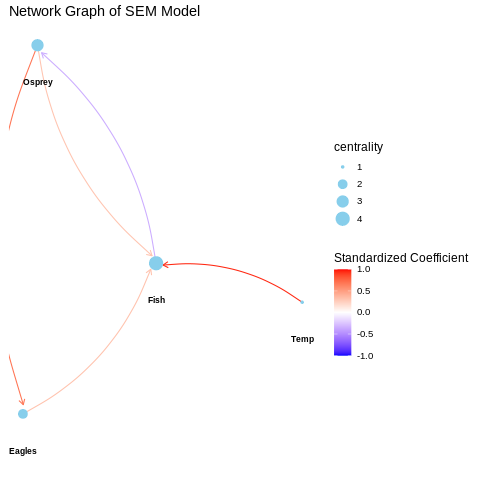

In [24]:
%%R
library(ggplot2)
library(ggnetwork) # For network graph visualization
library(sna) # For network analysis functions
library(stringr)

# Create a network object from the 'df' data frame
net <- network(df2, directed = TRUE)

new_labels <- c("fish_availability" = "Fish",
                 "osprey_count" = "Osprey",
                 "bald_eagle_count" = "Eagles",
                 "temperature" = "Temp")
# Calculate node centrality for sizing (optional)
centrality <- sna::degree(net, gmode = "digraph")
net %v% "centrality" <- centrality
net %v% "vertex.names" <- new_labels[net %v% "vertex.names"]

# Create the network graph using ggplot2 and ggnetwork
options(repr.plot.width = 12, repr.plot.height = 6)
ggplot(net, aes(x = x, y = y, xend = xend, yend = yend)) +
  geom_edges(arrow = arrow(length = unit(6, "pt")),
             aes(color = coefficient), curvature = 0.2) +
  geom_nodes(aes(size = centrality), color = "skyblue") +
  geom_nodetext(aes(label = vertex.names), fontface = "bold", size=3, nudge_y=-0.1) +
  scale_color_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, limits = c(-1, 1)) +
  theme_blank() +
  labs(title = "Network Graph of SEM Model",
       color = "Standardized Coefficient")